<a href="https://colab.research.google.com/github/EDWINYAPZ/unsupervised-data-set-algorithm-KNN/blob/main/unsupervised_data_set_algorithm_KNN_(Edwin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

#import the necessary libraries



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
data = pd.read_csv("iris.csv")
#Load the datasets

In [ ]:
data.info()
#Assuming 'data' is your DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe().round(3)
#describe the count mean standard deviation min and more

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [ ]:
data.head()
#the first 5 columns

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.tail()
#The last 5 columns

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
data.aggregate([min,
                np.mean,
                np.std,
                np.median,
                max]
).round(2)
# compute the desired aggregate satistics for the DataFrame

<ipython-input-8-e3d415fd6b50>:1: FutureWarning: ['species'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.aggregate([min,


,sepal_length,sepal_width,petal_length,petal_width,species
min,4.30,2.00,1.00,0.10,setosa
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
median,5.80,3.00,4.35,1.30,NaN
max,7.90,4.40,6.90,2.50,virginica


In [ ]:
data.isnull()
#check have empty cell or not

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
data.shape
#show how many columns and rows

(150, 5)

In [ ]:
data.groupby("species").size()
#group the data by the 'species' column and calculate the size of each group

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [ ]:
features_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
x = data[features_columns].values
y = data["species"].values

#alternarive way of selecting features and labels array:
# x = datasets.iloc[: 1:5].value

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Import the necessary library
le = LabelEncoder( )
#create an instance of the LableEncoder
y = le.fit_transform(y)
#fit the LabelEncoder to the target variable and transform it

In [ ]:
print(y)
#display y result

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<Figure size 640x480 with 0 Axes>

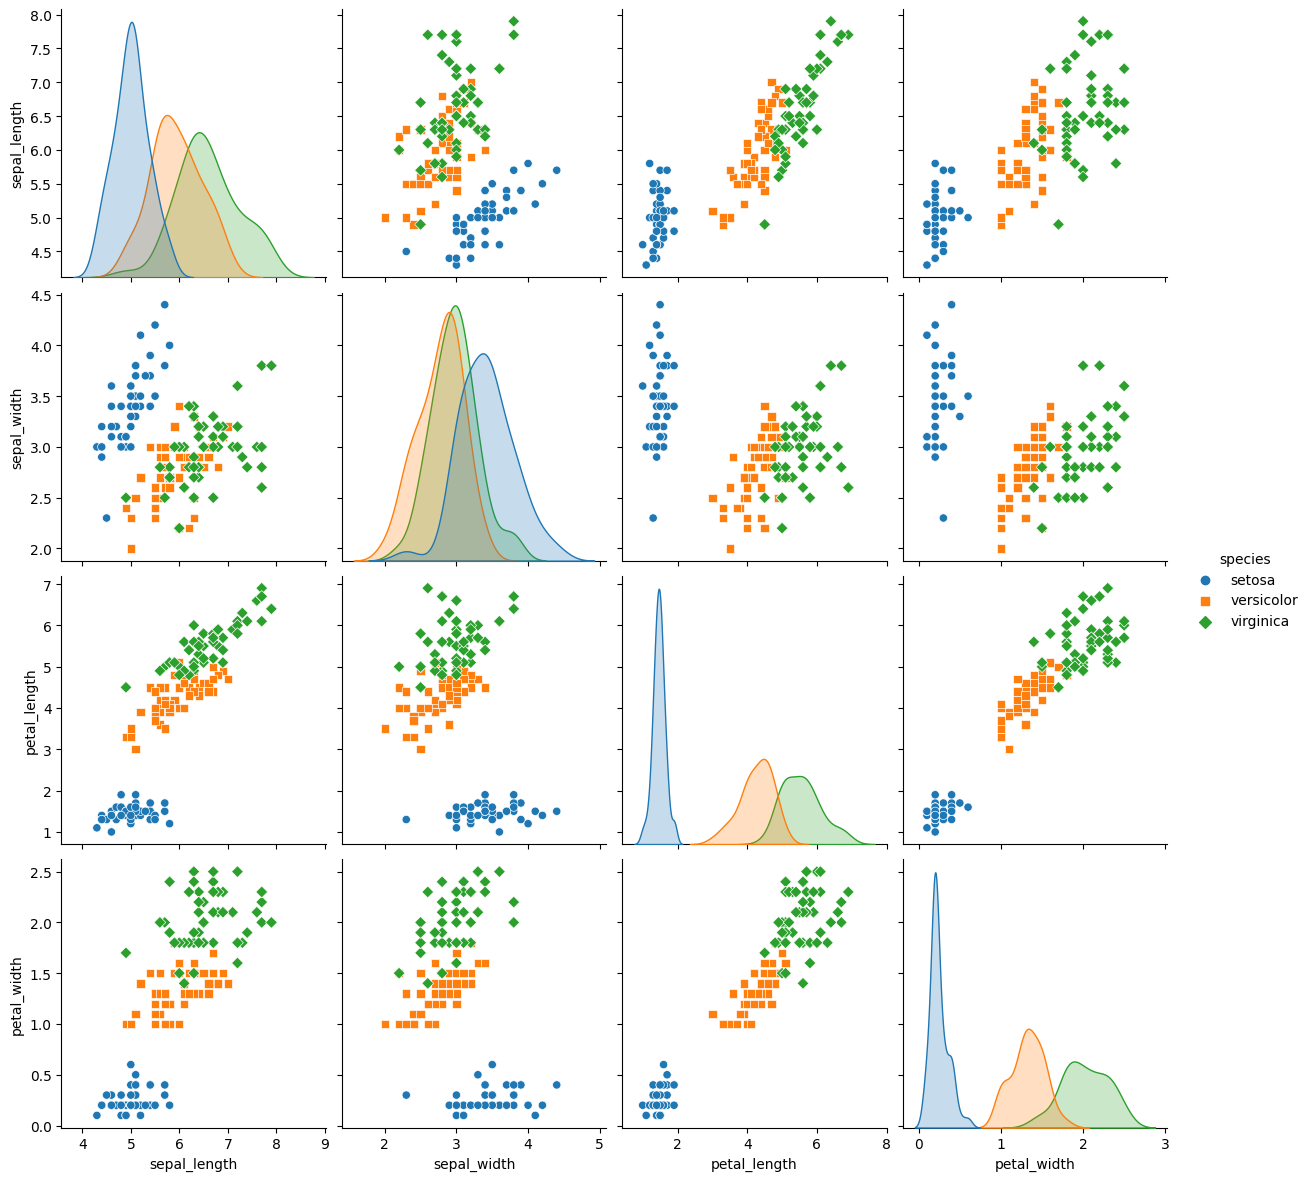

In [ ]:
from matplotlib import markers
import seaborn as sns
#import the necessary libraries
%matplotlib inline
#set the matplotlib backend to display plots inline
plt.figure()
#create a new figure
sns.pairplot(data, hue="species", height=3, markers=["o", "s", "D"])
#create a pairplot using seaborn
plt.show()
# display the plot

In [ ]:
from sklearn.model_selection import train_test_split
#import the necessary library
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#split the data into training and testing sets

In [ ]:
#fitting clasifier to the training set
#loading libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

#instantiate learning model(k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

#fitting the model
classifier.fit(x_train, y_train)

#predicting the test set results
y_pred = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
#compute the confusion matrix
cm
#output the confuson matrix

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [ ]:
from sklearn.metrics import accuracy_score
#import the necessary library

accuracy = accuracy_score(y_test, y_pred) * 100
#compute the accuracy score
print("Accuracy of our model is equal to " + str(round(accuracy, 2)) + "%.")
#output the accuracy score


Accuracy of our model is equal to 96.67%.


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c='blue',
           cmap=plt.cm.Set1, edgecolor='k', s=x[:, 3]*50)
for name, label in [('Viginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
  ax.text3D(x[y == label, 0].mean(),
            x[y == label, 1].mean(),
            x[y == label, 2].mean(),'species',
            horizontalalignment='center',
            bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)
  ax.set_title("3D visualization", fontsize=40)
  ax.set_xlabel("Sepal Length [cm]", fontsize=25)
  ax.w_xaxis.set_ticklabels([])
  ax.set_ylabel("Sepal width [cm]", fontsize=25)
  ax.w_yaxis.set_ticklabels([])
  ax.set_zlabel("Petal Length [cm]", fontsize=25)
  ax.w_zaxis.set_ticklabels([])

  plt.show()

<ipython-input-20-1f22fc06025c>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], c='blue',
<ipython-input-20-1f22fc06025c>:14: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-20-1f22fc06025c>:16: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-20-1f22fc06025c>:18: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


<Figure size 2000x1500 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c='blue', cmap=plt.cm.Set1, edgecolor='k',
           s=x[:, 3]*50)
for name, label in [('Viginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(x[y == label, 0].mean(),
              x[y == label, 1].mean(),
              x[y == label, 2].mean(),'species',
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)
ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()



<ipython-input-21-5349fba4b15d>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], c='blue', cmap=plt.cm.Set1, edgecolor='k',
<ipython-input-21-5349fba4b15d>:14: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-21-5349fba4b15d>:16: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-21-5349fba4b15d>:18: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


<Figure size 2000x1500 with 0 Axes>

3D PLOT

<ipython-input-22-1058f8cd07e0>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], c='blue', cmap=plt.cm.Set1, edgecolor='k')
<ipython-input-22-1058f8cd07e0>:26: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-22-1058f8cd07e0>:27: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-22-1058f8cd07e0>:28: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


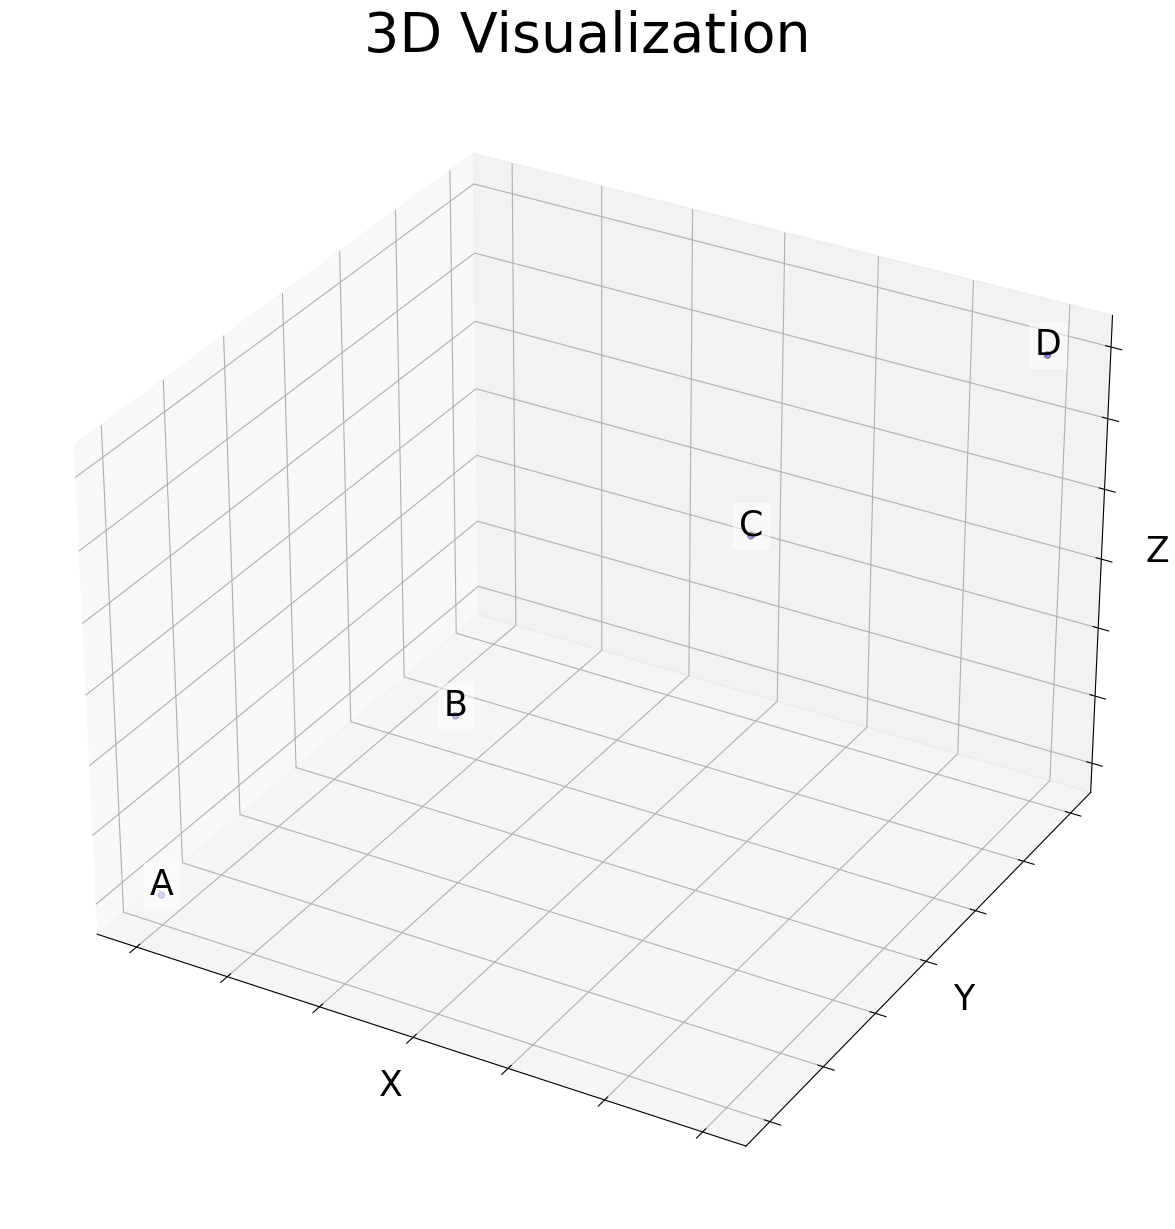

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Custom data
x = np.array([[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6]]).T  # x, y, z coordinates
labels = ['A', 'B', 'C', 'D']  # Labels for each data point

# Create a figure and a 3D axes object
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c='blue', cmap=plt.cm.Set1, edgecolor='k')

# Data point labels
for i, label in enumerate(labels):
    ax.text3D(x[i, 0], x[i, 1], x[i, 2], label,
              horizontalalignment='center', bbox=dict(alpha=.5, edgecolor='w', facecolor='w'), size=25)

# Set labels and title
ax.set_title("3D Visualization", fontsize=40)
ax.set_xlabel("X", fontsize=25)
ax.set_ylabel("Y", fontsize=25)
ax.set_zlabel("Z", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# Display the plot
plt.show()
